1000000000000.0 10604322490.650778
100000000000.0 106043226.9212753
10000000000.0 1060434.2839788548
1000000000.0 10606.357460903742
100000000.0 108.06367547441637
10000000.0 1.609711248992335
1000000.0 1.075454129113386e-06
100000.0 8.678336257934346e-12
10000.0 1.8889630961579503e-12
1000.0 2.609176508755018e-14
100.0 4.814872114094312e-14
10.0 1.4296673344363838e-13


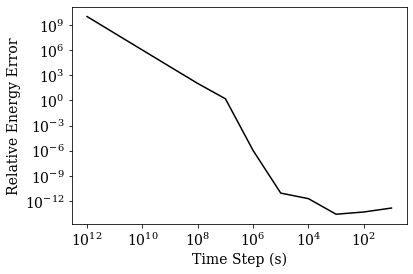

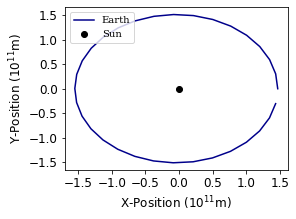

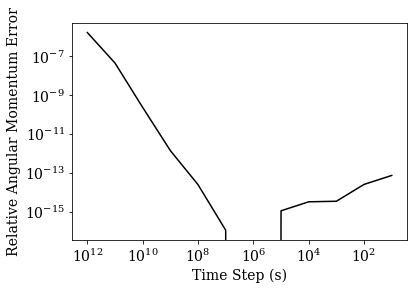

In [1]:
# leapfrog integrator convergence tests
import numpy as np
import matplotlib.pyplot as plt
import math

# setting the parameters
N = 31.6e+6
G = 6.67e-11
M = 1.989e+30
mu_e = G*M
h_e = 1e+6

#initialize arrays for the positions and velocities
x_earth = []
y_earth = []
z_earth = []
Vx_earth = []
Vy_earth = []
Vz_earth = []
r_earth =[]
t_earth = 0 
energy = []
time = []

#initial conditions
x_e = 147093162898.2
y_e = 0
z_e = 0
Vx_e = 0
Vy_e = 30290
Vz_e = 0

energy = []
time = []
Ei = (Vy_e)**2/2 - mu_e/x_e

r_e = np.sqrt(x_e**2 + y_e**2 + z_e**2)
r_earth.append(r_e) 
a_x = -mu_e/r_e**3 * x_e
a_y = -mu_e/r_e**3 * y_e
a_z = -mu_e/r_e**3 * z_e

# euler integrator to determine the orbit
while t_earth < N:

    # appending the current positions, time and velocities to the lists
    x_earth.append(x_e)
    y_earth.append(y_e)
    z_earth.append(z_e)
    Vx_earth.append(Vx_e)
    Vy_earth.append(Vy_e)
    Vz_earth.append(Vz_e)

    # update partial velocity
    Vx_temp = Vx_e + a_x * h_e/2
    Vy_temp = Vy_e + a_y * h_e/2
    Vz_temp = Vz_e + a_z * h_e/2

    # update positions
    x_e = x_e + h_e * Vx_temp
    y_e = y_e + h_e * Vy_temp
    z_e = z_e + h_e * Vz_temp

    # update accerleration
    r_e = np.sqrt(x_e**2+y_e**2+z_e**2)
    a_x = -mu_e/r_e**3 * x_e
    a_y = -mu_e/r_e**3 * y_e
    a_z = -mu_e/r_e**3 * z_e

    # update velocity   
    Vx_e = Vx_temp + a_x * h_e/2
    Vy_e = Vy_temp + a_y * h_e/2
    Vz_e = Vz_temp + a_z * h_e/2

    t_earth = t_earth + h_e


x_earth = np.array(x_earth) * 1e-11
y_earth = np.array(y_earth) * 1e-11

plt.figure(1)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
plt.plot(x_earth,y_earth, label ='Earth', color = 'darkblue')
plt.xlabel('X-Position ($10^{11}$m)',fontsize=12)
plt.ylabel('Y-Position ($10^{11}$m)',fontsize=12)
plt.rc('font', family='serif')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(0,0,'ko',label='Sun')
plt.legend(loc="upper left")
plt.savefig('LF1e+6.png',dpi=300, bbox_inches='tight')
# import packages
import matplotlib.pyplot as plt
import numpy as np

# Set constant paramters that will be used throughout
period_m = 3.154e+7
G = 6.67e-11
M = 1.989e+30
mu = G*M

# ------------------- Leapfrog algorithm ------------- 

interval = np.logspace(12,1,12)
energy = []
ang =[]
radius =[]

for i in range(len(interval)):

    dt = interval[i]
    
    # initialise the empty lists to be appended into
    x_vals = []
    y_vals = []
    z_vals = []
    Vx_vals = []
    Vy_vals = []
    Vz_vals = []
    time = []
    t = 0

    #reset initial conditions
    x = 147093162898.2
    y = 0
    z = 0
    Vx = 0
    Vy = 30290
    Vz = 0

    # set intial acceleration
    r = np.sqrt(x**2 + y**2 + z**2)
    a_x = -mu/r**3 * x
    a_y = -mu/r**3 * y
    a_z = -mu/r**3 * z
    
    Ei = (Vy)**2/2 - mu/x
    phi_dot = (x*Vy - Vx*y)/(x**2 + y**2)
    Ji = r**2 * phi_dot

    # use the most efficient method with minimal steps
    while t < period_m:

        # appending the current positions, time and velocities to the lists
        x_vals.append(x)
        y_vals.append(y)
        z_vals.append(z)
        Vx_vals.append(Vx)
        Vy_vals.append(Vy)
        Vz_vals.append(Vz)
        radius.append(r)

        # update partial velocity
        Vx_temp = Vx + a_x * dt/2
        Vy_temp = Vy + a_y * dt/2
        Vz_temp = Vz + a_z * dt/2

        # update positions
        x = x + dt * Vx_temp
        y = y + dt * Vy_temp
        z = z + dt * Vz_temp

        # update accerleration
        r = np.sqrt(x**2+y**2+z**2)
        a_x = -mu/r**3 * x
        a_y = -mu/r**3 * y
        a_z = -mu/r**3 * z

        # update velocity   
        Vx = Vx_temp + a_x * dt/2
        Vy = Vy_temp + a_y * dt/2
        Vz = Vz_temp + a_z * dt/2

        #update time
        t = t + dt
    
    #final energy calculation
    vf = np.sqrt(Vx**2 + Vy**2)
    Ef = vf**2/2 - mu/np.sqrt(x**2+y**2)
    
    phi_dot = (x*Vy - Vx*y)/(x**2 + y**2)
    r = np.sqrt(x**2+y**2+z**2)
    Jf = r**2 * phi_dot
    
    print(dt,abs(Ef-Ei)/(abs(Ei)))
    energy.append(abs(Ef-Ei)/(abs(Ei)))
    ang.append(abs(Jf-Ji)/abs(Ji))

    
plt.figure(1)
plt.plot(interval,energy,color='black')
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Time Step (s)',fontsize=14)
plt.ylabel('Relative Energy Error',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rc('font', family='serif')
plt.savefig('energyerrorLF.png',dpi=300, bbox_inches='tight')
plt.show()

plt.figure(1)
plt.plot(interval,ang,color='black')
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Time Step (s)',fontsize=14)
plt.ylabel('Relative Angular Momentum Error',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rc('font', family='serif')
plt.savefig('angregLF.png',dpi=300, bbox_inches='tight')
plt.show()